In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [104]:
episodes = pd.read_csv("data/episodes.csv", header=0,
                       usecols=["title", "season", "episode"],
                       names=["title", "c1", "c2", "c3", "c4", "season", "episode"])

In [117]:
lines = pd.read_csv("data/lines_full.csv", header=0,
                    names=["title", "character", "line"])
lines = lines[lines.character != "Scene Description"]
lines.title = lines.title.str.replace("Shots", "Shots!!!")
lines.title = lines.title.str.replace("HappyHolograms", "#HappyHolograms")
lines.title = lines.title.str.replace("REHASH", "#REHASH")
lines.title = lines.title.str.replace("Imaginationland$", "Imaginationland Episode I", regex=True)

In [118]:
data = lines.merge(episodes, how="left", on="title")
data.season = data.season.astype(int)
data.episode = data.episode.astype(int)

In [125]:
lines_season_tot = data.groupby("season").count().line

In [107]:
lines

,title,character,line
0,Cartman Gets an Anal Probe,Scene Description,At the bus stop.
1,Cartman Gets an Anal Probe,The Boys,"School days, school days, teacher's golden ru..."
2,Cartman Gets an Anal Probe,Kyle Broflovski,"Ah, damn it! My little brother's trying to fol..."
3,Cartman Gets an Anal Probe,Ike Broflovski,Eat banana.
4,Cartman Gets an Anal Probe,Kyle,"Ike, you can't come to school with me. [Ike Ch..."
...,...,...,...
95315,South ParQ Vaccination Special,Cartman,[turns to face Clyde] Yeah?
95316,South ParQ Vaccination Special,Clyde,[standing with Jimmy and an unnamed Hispanic k...
95317,South ParQ Vaccination Special,Cartman,[he takes off his mask] Casa Bonita?! Hell yea...
95318,South ParQ Vaccination Special,Scene Description,Fourth grade classroom. Mr. Garrison opens the...


In [115]:
lines.character.value_counts().head()

Cartman              11307
Scene Description    11116
Stan                  8364
Kyle                  7902
Randy                 3493
Name: character, dtype: int64

In [109]:
# lines_short = lines[lines.character.isin(lines.character.value_counts()[:10].index)]
lines_short = lines[lines.character.isin(["Kyle", "Cartman", "Stan", "Kenny", "Butters"])]

In [110]:
lines_short.to_csv("data/lines.csv")

In [111]:
len(lines_short)/len(lines)

0.3319450272765422

In [40]:
lines_short.head()

,title,character,line
4,Cartman Gets an Anal Probe,Kyle,"Ike, you can't come to school with me. [Ike Ch..."
6,Cartman Gets an Anal Probe,Kyle,"Dude, don't call my brother a dildo!"
8,Cartman Gets an Anal Probe,Kyle,"Well, I don't know...[He faces Cartman and poi..."
9,Cartman Gets an Anal Probe,Cartman,I know what it means!
10,Cartman Gets an Anal Probe,Kyle,"Well, what?"


In [112]:
data_short = lines_short.merge(episodes, how="left", on="title")
data_short.season = data_short.season.astype(int)
data_short.episode = data_short.episode.astype(int)

In [113]:
to_plot = data_short.groupby(["season", "character"]).size()

In [134]:
episodes_per_season = data.groupby("season")["episode"].max()

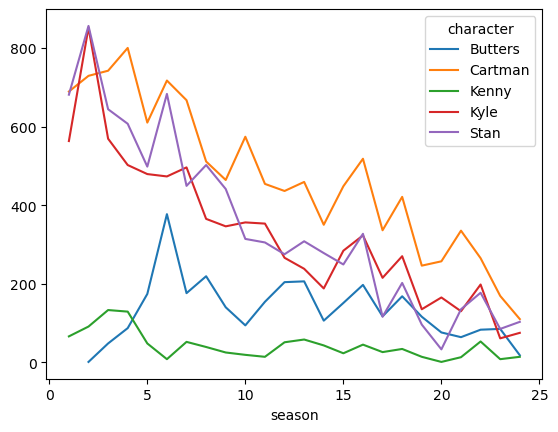

In [114]:
to_plot.unstack().plot()
plt.show()

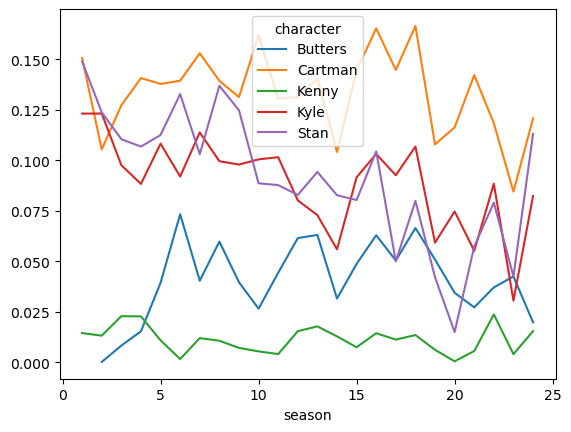

In [132]:
(to_plot / lines_season_tot).unstack().plot()
plt.show()

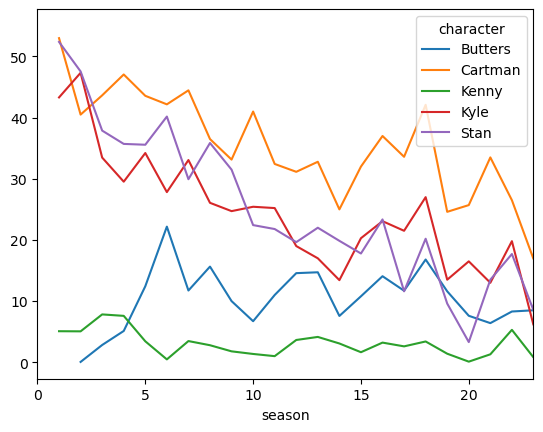

In [139]:
(to_plot / episodes_per_season).unstack().plot()
plt.xlim(0, 23)
plt.show()

In [148]:
(to_plot / episodes_per_season).unstack()['Stan']

season
1     52.384615
2     47.555556
3     37.882353
4     35.705882
5     35.571429
6     40.176471
7     29.933333
8     35.857143
9     31.500000
10    22.428571
11    21.785714
12    19.642857
13    22.000000
14    19.857143
15    17.785714
16    23.357143
17    11.600000
18    20.200000
19     9.600000
20     3.300000
21    13.500000
22    17.700000
23     8.500000
24    51.500000
Name: Stan, dtype: float64

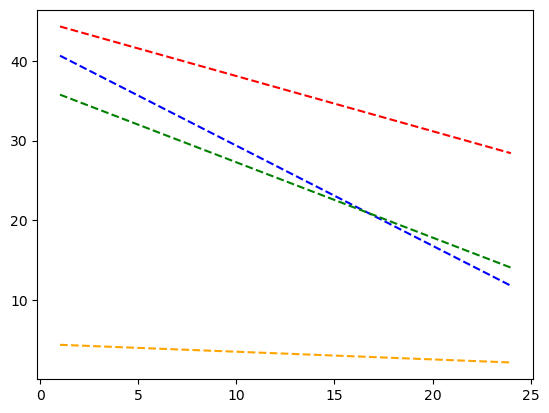

In [157]:
# trendlines
colors = {'Kyle': "green", 'Stan': "blue", 'Cartman': "red", 'Kenny': "orange", 'Butters': "blue"}

for boy in ["Stan", "Kyle", "Cartman", "Kenny"]:
    z = np.polyfit(np.arange(1, 25), (to_plot / episodes_per_season).unstack()[boy], 1)
    p = np.poly1d(z)
    plt.plot(np.arange(1, 25), p(np.arange(1, 25)), "--", c=colors[boy])